# Zomato Data Analysis Project

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data and Creating Dataframe

In [2]:
dataframe = pd.read_csv("Zomato data .csv")

In [3]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Data Cleaning and Data preprocessing

In [4]:
# convert the data type of column - rate
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [6]:
# Types of Resturant
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of resturant')

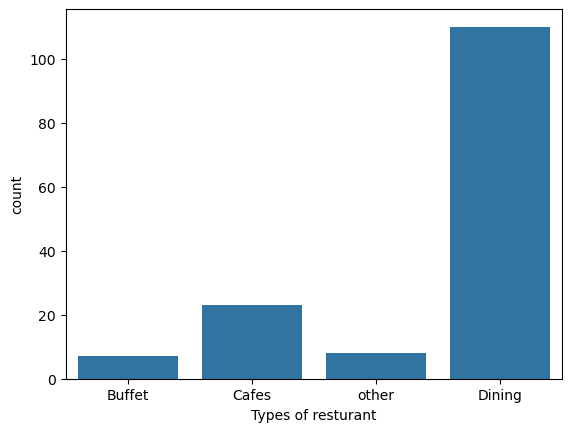

In [7]:
sns.countplot(x = dataframe['listed_in(type)'])
plt.xlabel("Types of resturant")

In [8]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

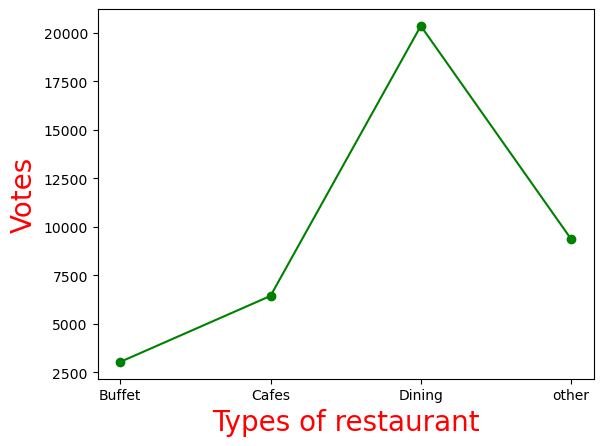

In [10]:
grouped_data= dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result , c='green',marker = 'o')
plt.xlabel('Types of restaurant', c = 'red',size = 20)
plt.ylabel('Votes',c = 'red' , size = 20)

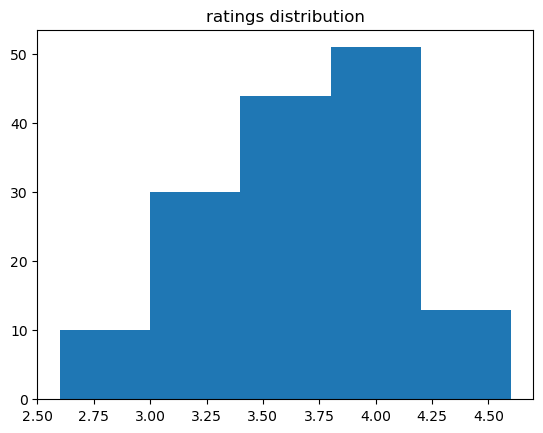

In [12]:
plt.hist(dataframe['rate'],bins = 5)
plt.title("ratings distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

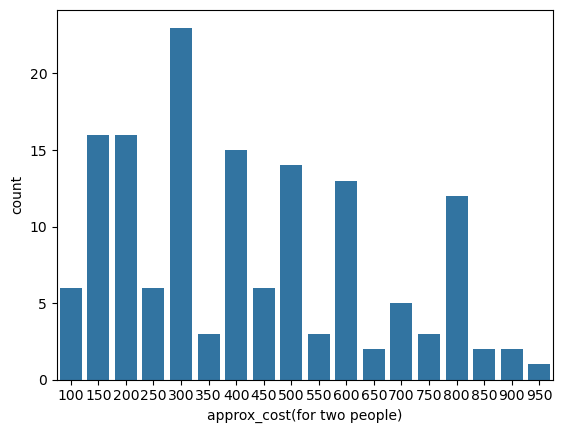

In [14]:
# Average order spendings by couples
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

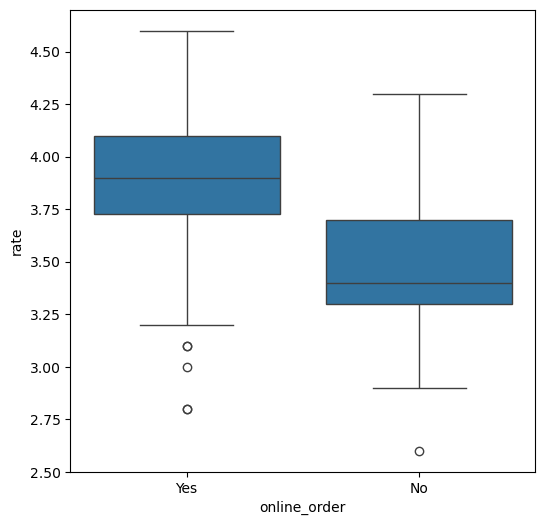

In [15]:
# Which mode recevied maximum rating
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate' , data = dataframe)

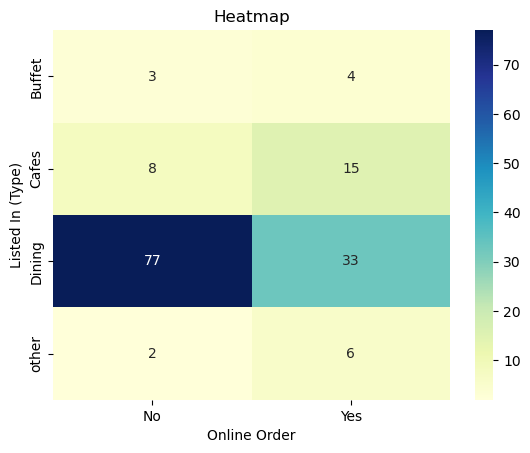

In [16]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)', columns = 'online_order' ,aggfunc = 'size',fill_value = 0)
sns.heatmap(pivot_table,annot = True,cmap = 'YlGnBu',fmt ='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

## Conclusion
* **Ques 1.** What type of restaurant do the majority of the customers order from?<br>
  **Answer:** Majority of the resturant falls in dining category.
* **Ques 2.** How many votes has each type of restaurant received from customers?<br>
  **Answer:** Dining resturants has received maximum number of votes.
* **Ques 3.** What are the ratings that the majority of the resturants have received?<br>
  **Answer:** The majority resturants received ratings from 3.5 to 4.
* **Ques 4.** Zomato has observed that most couples order of their food online. What is their average spending on each order?<br>
  **Answer:** The majority of couples prefer resturants with an approx: cost of 300 rupees.
* **Ques 5.** Which mode(online or offline)has received the maximum rating?<br>
  **Answer:** offline order received lower rating in comparison to online order.
* **Ques 6.** Which type of resturant received more offline orders,so that Zomato can provide customers with some good offers?<br>
  **Answer:** Dining resturants primarily accept offline orders, whereas cafes primarily receive online orders. this suggests that clients prefer orders in person at resturants, but prefer online ordering at cafes.